# 
<h1 style="text-align: center;">ELE489 FUNDAMENTALS OF MACHINE LEARNING</h1>
<h2 style="text-align: center;">HW5</h2>
<h3 style="text-align: center;">ALI OZYUKSEL</h3>
<h3 style="text-align: center;">2220357137</h3>
<h3 style="text-align: center;"> </h3>
<h3 style="text-align: center;">08.06.2025</h3>

## Question 1
* 2D data is generated.
* The data will work with non-linear SVMs
* It will not work with linear SVMs

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os

X, y = make_circles(n_samples=300, factor=0.5, noise=0.01, random_state=42)
# classification report code just like in the homework 2
def c_report(y_true, y_pred, title="Classification Report", show_plot=True):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df = report_df.round(5)
    os.makedirs("reports", exist_ok=True)
    report_df.to_csv(f"reports/{title}.csv", index=True)
    if show_plot:
        plt.figure(figsize=(8, 4))
        sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="rocket", fmt=".2f", cbar=True)
        plt.title(title)
        plt.yticks(rotation=0)
        plt.savefig(f"reports/{title}.png", bbox_inches='tight')
        plt.show()
    return report_df

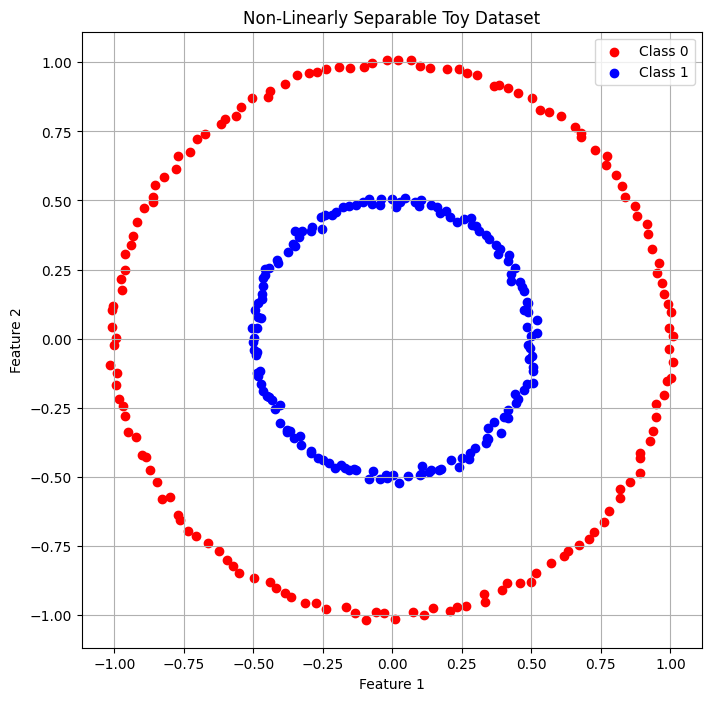

In [26]:
plt.figure(figsize=(8, 8))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.title("Non-Linearly Separable Toy Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

## Question 2
* linear SVM is used but it did not work very well as we expected.
* inaccurate decision boundary and discriminant function is showed in the graph.
* classification report is provided 

In [27]:
#linear SVM
linear_svm = SVC(kernel='linear', C=1.0)
linear_svm.fit(X, y)

y_pred_linear = linear_svm.predict(X)

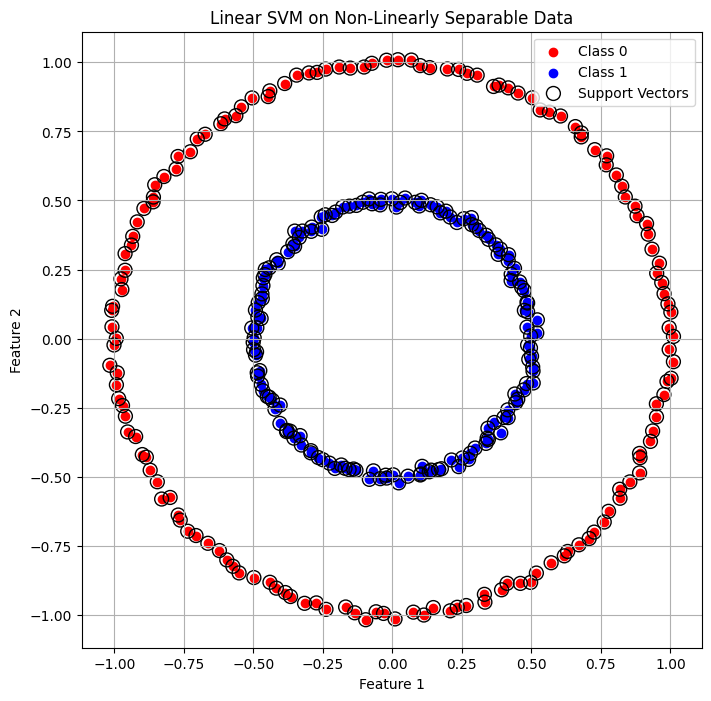

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')

# showing the support vectors evaluated by linear SVM

plt.scatter(linear_svm.support_vectors_[:, 0], linear_svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("Linear SVM on Non-Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


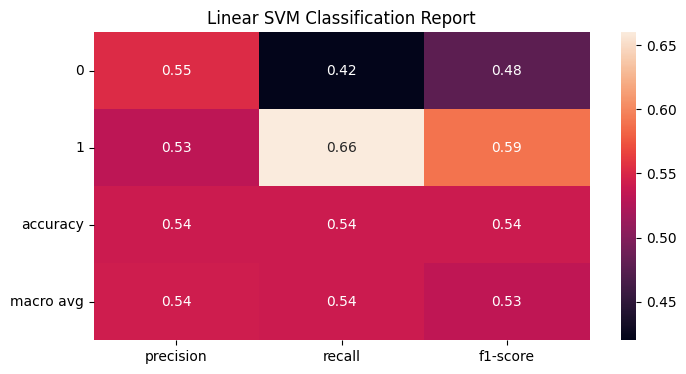

,precision,recall,f1-score,support
0,0.55263,0.42,0.47727,150.00
1,0.53226,0.66,0.58929,150.00
accuracy,0.54000,0.54,0.54000,0.54
macro avg,0.54244,0.54,0.53328,300.00
weighted avg,0.54244,0.54,0.53328,300.00


In [29]:
c_report(y, y_pred_linear, title="Linear SVM Classification Report")

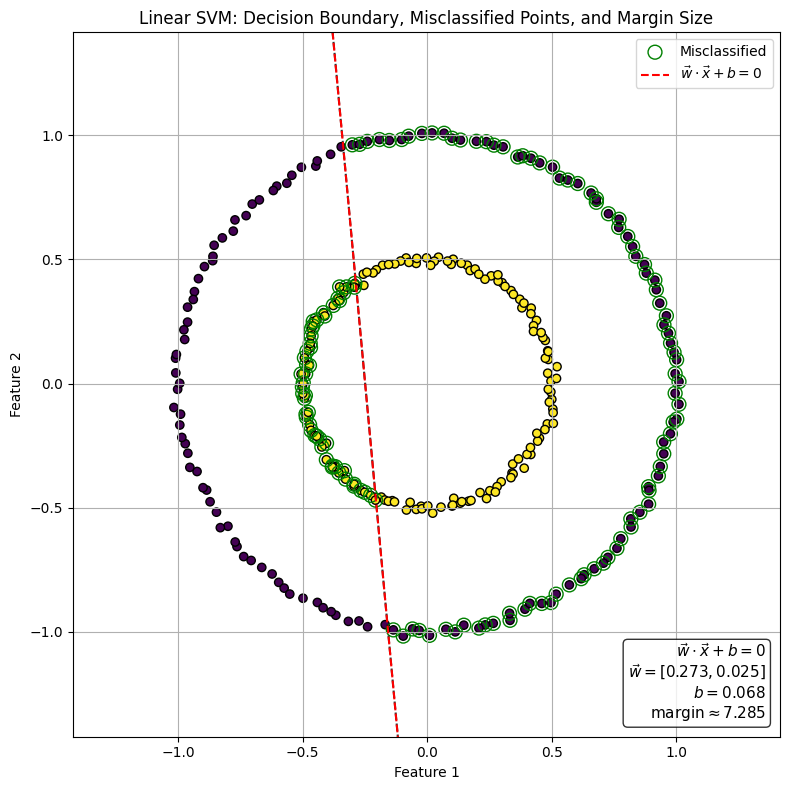

In [35]:
# decision boundary and margin size
# and misclassified points
mis_idx = np.where(y != y_pred_linear)[0]

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
    np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
)
Z = linear_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

w = linear_svm.coef_[0]
b = linear_svm.intercept_[0]
margin = 2 / np.linalg.norm(w)

plt.figure(figsize=(8, 8))


plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

plt.scatter(X[mis_idx, 0], X[mis_idx, 1], facecolors='none', edgecolors='green', s=100, label='Misclassified')


plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.8, linestyles='--')
x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_line = -(w[0] * x_line + b) / w[1]
plt.plot(x_line, y_line, 'r--', label=r"$\vec{w} \cdot \vec{x} + b = 0$")

equation = (
    r"$\vec{w} \cdot \vec{x} + b = 0$" "\n"
    r"$\vec{w} = [" + f"{w[0]:.3f}" + r", " + f"{w[1]:.3f}" + r"]$" "\n"
    r"$b = " + f"{b:.3f}" + r"$" "\n"
    r"$\text{margin} \approx " + f"{margin:.3f}" + r"$"
    
)

plt.text(0.98, 0.02, equation, transform=plt.gca().transAxes,
         fontsize=11, ha='right', va='bottom',
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

x_range = x_max - x_min
y_range = y_max - y_min

plt.xlim(x_min - 0.2 * x_range, x_max + 0.2 * x_range)
plt.ylim(y_min - 0.2 * y_range, y_max + 0.2 * y_range)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM: Decision Boundary, Misclassified Points, and Margin Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Question 3
* instead of linear function, non-linear function is used.
* the data is lifted up to higher dimension to make it linearly seperable (cover's theorem)
* the kernel function used is **_Radial Basis Function_** and it's equation is down below.

$$
K(\mathbf{\vec{x}}, \mathbf{\vec{x'}}) = \exp\left(-\frac{\|\mathbf{\vec{x}} - \mathbf{\vec{x'}}\|^2}{2\sigma^2}\right)
$$


In [31]:
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale') 
rbf_svm.fit(X, y)
y_pred_rbf = rbf_svm.predict(X)

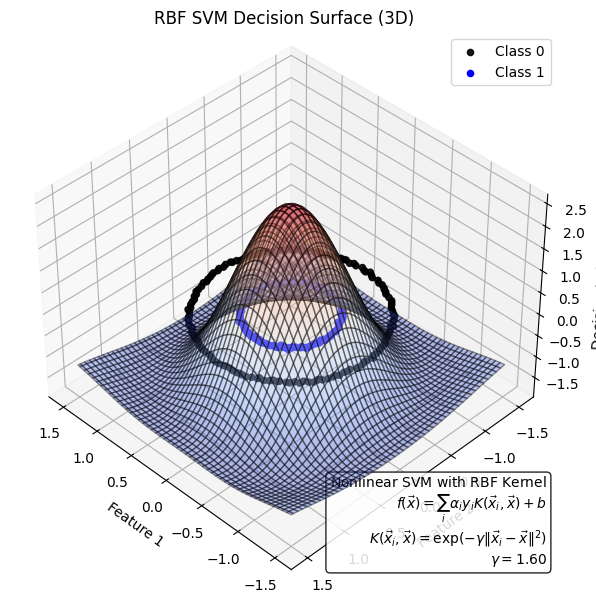

In [32]:
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100),
                     np.linspace(-1.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Her noktadaki decision function değerini al
Z = rbf_svm.decision_function(grid)
Z = Z.reshape(xx.shape)

# 3D yüzey çizimi
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Decision surface
ax.plot_surface(xx, yy, Z, cmap='coolwarm', alpha=0.4, edgecolor='k')

# Gerçek veri noktaları (z ekseni sıfırda çizilecek)
ax.scatter(X[y==0, 0], X[y==0, 1], zs=0, zdir='z', c='black', label='Class 0', s=20, edgecolor='k', alpha=0.9)
ax.scatter(X[y==1, 0], X[y==1, 1], zs=0, zdir='z', c='blue', label='Class 1')
equation = (
    r"$\text{Nonlinear SVM with RBF Kernel}$" "\n"
    r"$f(\vec{x}) = \sum_i \alpha_i y_i K(\vec{x}_i, \vec{x}) + b$" "\n"
    r"$K(\vec{x}_i, \vec{x}) = \exp(-\gamma \|\vec{x}_i - \vec{x}\|^2)$" "\n"
    r"$\gamma = $" + f"{rbf_svm._gamma:.2f}"
)

ax.text2D(0.98, 0.02, equation, transform=ax.transAxes,
          fontsize=10, ha='right', va='bottom',
          bbox=dict(boxstyle="round", facecolor="white", alpha=0.85))

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Value')
ax.set_title("RBF SVM Decision Surface (3D)")
ax.view_init(elev=40, azim=135)  
plt.legend()
plt.tight_layout()
plt.show()

## Question 4
* decision boundary, margin and support vectors are shown in the followwing plot.
* classification report is provided to evaluate model's performence

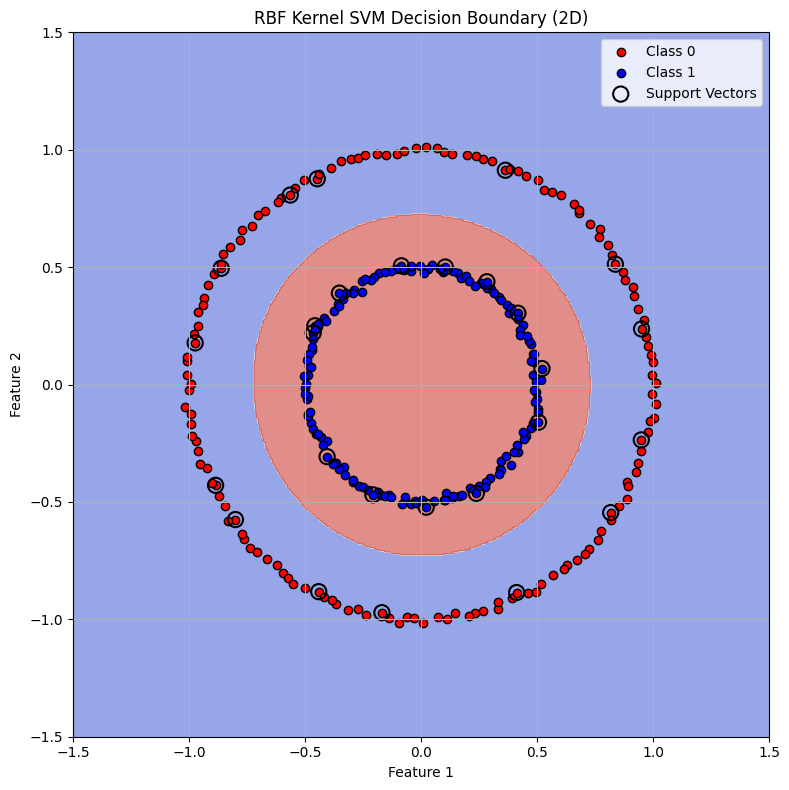

In [33]:
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500),
                     np.linspace(-1.5, 1.5, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

Z = rbf_svm.predict(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label='Class 0', edgecolor='k')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label='Class 1', edgecolor='k')

plt.scatter(rbf_svm.support_vectors_[:, 0], rbf_svm.support_vectors_[:, 1],
            s=120, facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

plt.title("RBF Kernel SVM Decision Boundary (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


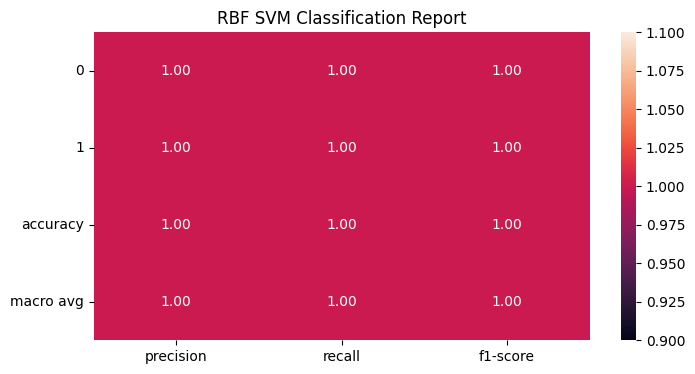

,precision,recall,f1-score,support
0,1.0,1.0,1.0,150.0
1,1.0,1.0,1.0,150.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,300.0
weighted avg,1.0,1.0,1.0,300.0


In [34]:
c_report(y, y_pred_rbf, title="RBF SVM Classification Report")
